# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 310kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import Statements

In [297]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [298]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [299]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")

In [300]:
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [301]:
df_hh_income.shape

(29322, 3)

In [302]:
df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [303]:
df_pct_poverty.shape

(29329, 3)

In [304]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [305]:
df_pct_completed_hs.shape

(29329, 3)

In [306]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [307]:
df_share_race_city.shape

(29268, 7)

In [308]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [309]:
df_fatalities.shape

(2535, 14)

In [310]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [311]:
print(f"Median Household income dataset has {df_hh_income.shape[0]} rows and {df_hh_income.shape[1]} columns.")
print(f"Pct people below poverty level dataset has {df_pct_poverty.shape[0]} rows and {df_pct_poverty.shape[1]} columns.")
print(f"Pct over 25 that complete High School dataset has {df_pct_completed_hs.shape[0]} rows and {df_pct_completed_hs.shape[1]} columns.")
print(f"Share of race by city dataset has {df_share_race_city.shape[0]} rows and {df_share_race_city.shape[1]} columns.")
print(f"Deaths by police dataset has {df_fatalities.shape[0]} rows and {df_fatalities.shape[1]} columns.")

Median Household income dataset has 29322 rows and 3 columns.
Pct people below poverty level dataset has 29329 rows and 3 columns.
Pct over 25 that complete High School dataset has 29329 rows and 3 columns.
Share of race by city dataset has 29268 rows and 7 columns.
Deaths by police dataset has 2535 rows and 14 columns.


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [312]:
print(f"Are there any missing values in the Median Household income dataset: {df_hh_income.isna().values.any()}")
print(f"Are there any duplicated values in the Median Household income dataset: {df_hh_income.duplicated().values.any()}")

Are there any missing values in the Median Household income dataset: True
Are there any duplicated values in the Median Household income dataset: False


In [313]:
df_hh_income.count()

Geographic Area    29322
City               29322
Median Income      29271
dtype: int64

In [19]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


### df_hh_income comment ###
Clean up column Median Income, remove ',', '-', '(X)' and '+' before to convert the value to numeric and then fill the NaN values to 0

In [314]:
df_hh_income.loc[1347]

Geographic Area             AZ
City               Ventana CDP
Median Income           2,500-
Name: 1347, dtype: object

Some values in the Media Income has the value '(X)' we need to remove it

In [21]:
df_hh_income[df_hh_income['Median Income'] == '(X)'].count()

Geographic Area    1113
City               1113
Median Income      1113
dtype: int64

In [315]:
df_hh_income['Median Income'] = df_hh_income['Median Income'].str.replace(",","").str.replace("-","").str.replace("+","")

In [316]:
df_hh_income['Median Income'] = df_hh_income['Median Income'].apply(lambda val: 0 if val == '(X)' or val == '-' else val)

In [317]:
df_hh_income['Median Income'] = pd.to_numeric(df_hh_income['Median Income'])
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29322 non-null  object 
 1   City             29322 non-null  object 
 2   Median Income    28531 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.4+ KB


In [318]:
df_hh_income.fillna(0, inplace=True)
df_hh_income.count()

Geographic Area    29322
City               29322
Median Income      29322
dtype: int64

In [319]:
print(f"Are there any missing values in the Pct people below poverty level dataset: {df_pct_poverty.isna().values.any()}")
print(f"Are there any duplicated values in the Pct people below poverty level dataset: {df_pct_poverty.duplicated().values.any()}")

Are there any missing values in the Pct people below poverty level dataset: False
Are there any duplicated values in the Pct people below poverty level dataset: False


In [320]:
df_pct_poverty.count()

Geographic Area    29329
City               29329
poverty_rate       29329
dtype: int64

In [321]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


### df_pct_poverty dataset comment ###
Clean up the porverty rate before covert to numeric and fill with 0 the NaN values.

In [322]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].str.replace(",", "").str.replace("-","")

In [323]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])

In [324]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [325]:
df_pct_poverty.fillna(0, inplace=True)
df_pct_poverty.count()

Geographic Area    29329
City               29329
poverty_rate       29329
dtype: int64

In [326]:
print(f"Are there any missing values in the Pct over 25 that complete High School dataset: {df_pct_completed_hs.isna().values.any()}")
print(f"Are there any duplicated values in the Pct over 25 that complete High School dataset: {df_pct_completed_hs.duplicated().values.any()}")

Are there any missing values in the Pct over 25 that complete High School dataset: False
Are there any duplicated values in the Pct over 25 that complete High School dataset: False


In [327]:
df_pct_completed_hs.count()

Geographic Area         29329
City                    29329
percent_completed_hs    29329
dtype: int64

In [329]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


### df_pct_completed_hs ###
Clean up the value percent_completed_hs before coverting the value to numeric and fill NaN values with 0 if needed

In [ ]:
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].str.replace(",", "").str.replace("-","")

In [333]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])

In [334]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29132 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [335]:
df_pct_completed_hs.fillna(0, inplace=True)
df_pct_completed_hs.count()

Geographic Area         29329
City                    29329
percent_completed_hs    29329
dtype: int64

In [336]:
print(f"Are there any missing values in the Share of race by city dataset: {df_share_race_city.isna().values.any()}")
print(f"Are there any duplicated values in the Share of race by city dataset: {df_share_race_city.duplicated().values.any()}")

Are there any missing values in the Share of race by city dataset: False
Are there any duplicated values in the Share of race by city dataset: False


In [337]:
df_share_race_city.count()

Geographic area          29268
City                     29268
share_white              29268
share_black              29268
share_native_american    29268
share_asian              29268
share_hispanic           29268
dtype: int64

In [338]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


### df_share_race_city dataset comments ##
Clean up the share race values and then covert them to numeric, and fill NaN values to 0.

In [339]:
df_share_race_city['share_white'] = df_share_race_city['share_white'].apply(lambda val: 0 if val == '(X)' or val == '-' else val)
df_share_race_city['share_white'] = df_share_race_city['share_white'].str.replace(",","").str.replace("-","")
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'])

In [340]:
df_share_race_city['share_black'] = df_share_race_city['share_black'].apply(lambda val: 0 if val == '(X)' or val == '-' else val)
df_share_race_city['share_black'] = df_share_race_city['share_black'].str.replace(",","").str.replace("-","")
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'])

In [341]:
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].apply(lambda val: 0 if val == '(X)' or val == '-' else val)
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].str.replace(",","").str.replace("-","")
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'])

In [342]:
df_share_race_city['share_asian'] = df_share_race_city['share_asian'].apply(lambda val: 0 if val == '(X)' or val == '-' else val)
df_share_race_city['share_asian'] = df_share_race_city['share_asian'].str.replace(",","").str.replace("-","")
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'])

In [343]:
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].apply(lambda val: 0 if val == '(X)' or val == '-' else val)
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].str.replace(",","").str.replace("-","")
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'])

In [344]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [345]:
df_share_race_city.fillna(0, inplace=True)
df_share_race_city.count()

Geographic area          29268
City                     29268
share_white              29268
share_black              29268
share_native_american    29268
share_asian              29268
share_hispanic           29268
dtype: int64

In [347]:
print(f"Are there any missing values in the Deaths by police dataset: {df_fatalities.isna().values.any()}")
print(f"Are there any duplicated values in the Deaths by police dataset: {df_fatalities.duplicated().values.any()}")

Are there any missing values in the Deaths by police dataset: True
Are there any duplicated values in the Deaths by police dataset: False


In [348]:
df_fatalities.count()

id                         2535
name                       2535
date                       2535
manner_of_death            2535
armed                      2526
age                        2458
gender                     2535
race                       2340
city                       2535
state                      2535
signs_of_mental_illness    2535
threat_level               2535
flee                       2470
body_camera                2535
dtype: int64

In [349]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

### df_fatalities ###
Drop the Id column because it is only a consecutive integer and fill the NaN Values for the column "age" with the average age of the people killed by police per state since there is only 77 values missings.

In [350]:
df_fatalities.drop('id', axis=1, inplace=True)
df_fatalities.columns

Index(['name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race',
       'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera'],
      dtype='object')

In [105]:
df_fatalities[df_fatalities['age'].isna()]

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
124,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
658,Roger Albrecht,29/08/15,shot,knife,NaN,M,W,San Antonio,TX,False,other,Not fleeing,False
707,Lawrence Price,17/09/15,shot,gun,NaN,M,W,Brodhead,KY,False,attack,Not fleeing,False
769,Jason Day,12/10/15,shot,gun,NaN,M,B,Lawton,OK,False,attack,Not fleeing,False
802,John Tozzi,24/10/15,shot,gun,NaN,M,NaN,New Paltz,NY,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,TK TK,12/07/17,shot,blunt object,NaN,M,NaN,Grover Beach,CA,False,other,Not fleeing,False
2496,TK TK,15/07/17,shot,gun,NaN,M,NaN,Arlington,TX,False,attack,Foot,False
2521,TK TK,26/07/17,shot,gun,NaN,M,NaN,San Antonio,TX,False,attack,Not fleeing,False
2528,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False


Calculate average age per state

In [87]:
df_avgage = df_fatalities.groupby('state').agg({'age': pd.Series.mean})
df_avgage['age'] =  round(df_avgage['age'])
df_avgage.head()

,age
state,
AK,33.00
AL,38.00
AR,40.00
AZ,35.00
CA,35.00


In [351]:
df_avgage.loc['CA']['age']

35.0

Apply a function to fill the Nan values with the average age for the corresponding state.

In [352]:
def modify_row(row):
    if pd.isnull(row['age']):
        row['age'] = df_avgage.loc[row['state']]['age']
    return row

# Apply the function to each row
df_fatalities = df_fatalities.apply(modify_row, axis=1)

In [353]:
df_fatalities.iloc[2528]

name                       Alejandro Alvarado
date                                 27/07/17
manner_of_death                          shot
armed                                   knife
age                                     35.00
gender                                      M
race                                        H
city                               Chowchilla
state                                      CA
signs_of_mental_illness                 False
threat_level                           attack
flee                              Not fleeing
body_camera                             False
Name: 2528, dtype: object

In [354]:
df_fatalities.count()

name                       2535
date                       2535
manner_of_death            2535
armed                      2526
age                        2535
gender                     2535
race                       2340
city                       2535
state                      2535
signs_of_mental_illness    2535
threat_level               2535
flee                       2470
body_camera                2535
dtype: int64

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

Calculate the average poverty rate group by state

In [355]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [356]:
df_povertybystate = df_pct_poverty.groupby('Geographic Area', as_index=False).agg({'poverty_rate': pd.Series.mean})
df_povertybystate.sort_values('poverty_rate', ascending=False, inplace=True)
df_povertybystate.head()

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.27
10,GA,23.66
2,AR,22.96
32,NM,22.51


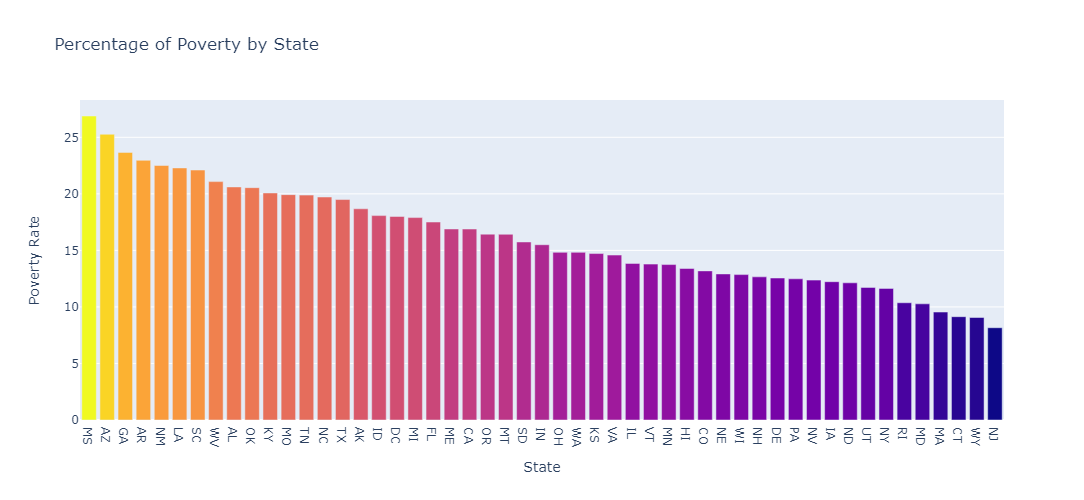

In [357]:
bar_state = px.bar(df_povertybystate, 
                 x=df_povertybystate['Geographic Area'], 
                 y=df_povertybystate['poverty_rate'], 
                 color=df_povertybystate['poverty_rate'], 
                 color_continuous_scale='plasma',
                 height=500,
                 title='Percentage of Poverty by State')
bar_state.update_layout(xaxis_title='State', 
                     yaxis_title='Poverty Rate', 
                     coloraxis_showscale=False
                     )
                    
bar_state.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [358]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [359]:
df_hsbystate = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs': pd.Series.mean})
df_hsbystate.sort_values('percent_completed_hs', inplace=True)
df_hsbystate.head()

,Geographic Area,percent_completed_hs
43,TX,74.09
25,MS,78.47
10,GA,78.63
32,NM,78.97
18,LA,79.12


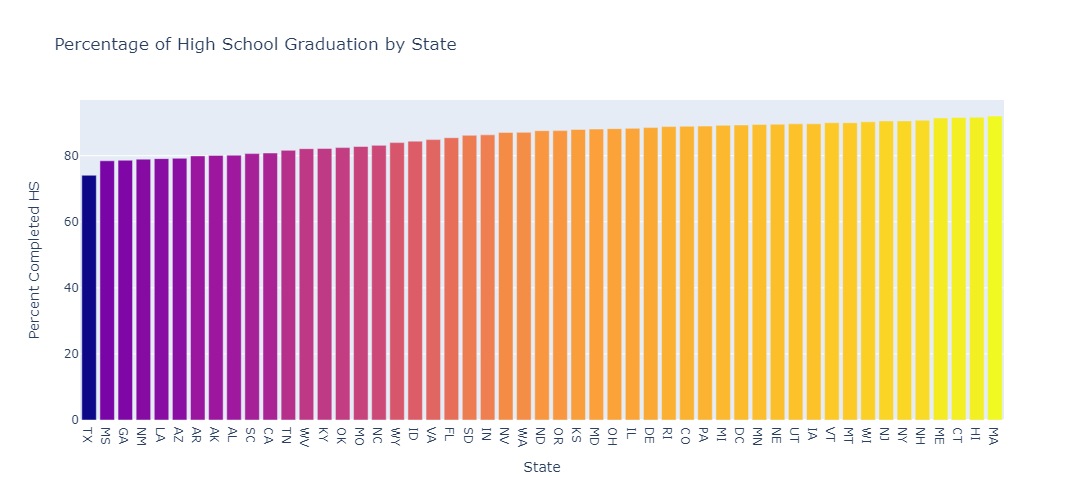

In [360]:
bar_hs = px.bar(df_hsbystate, 
                 x=df_hsbystate['Geographic Area'], 
                 y=df_hsbystate['percent_completed_hs'], 
                 color=df_hsbystate['percent_completed_hs'], 
                 color_continuous_scale='plasma',
                 height=500,
                 title='Percentage of High School Graduation by State')
bar_hs.update_layout(xaxis_title='State', 
                     yaxis_title='Percent Completed HS', 
                     coloraxis_showscale=False
                     )
                    
bar_hs.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [361]:
df_povertybystate.sort_values('Geographic Area', inplace=True)
df_hsbystate.sort_values('Geographic Area', inplace=True)

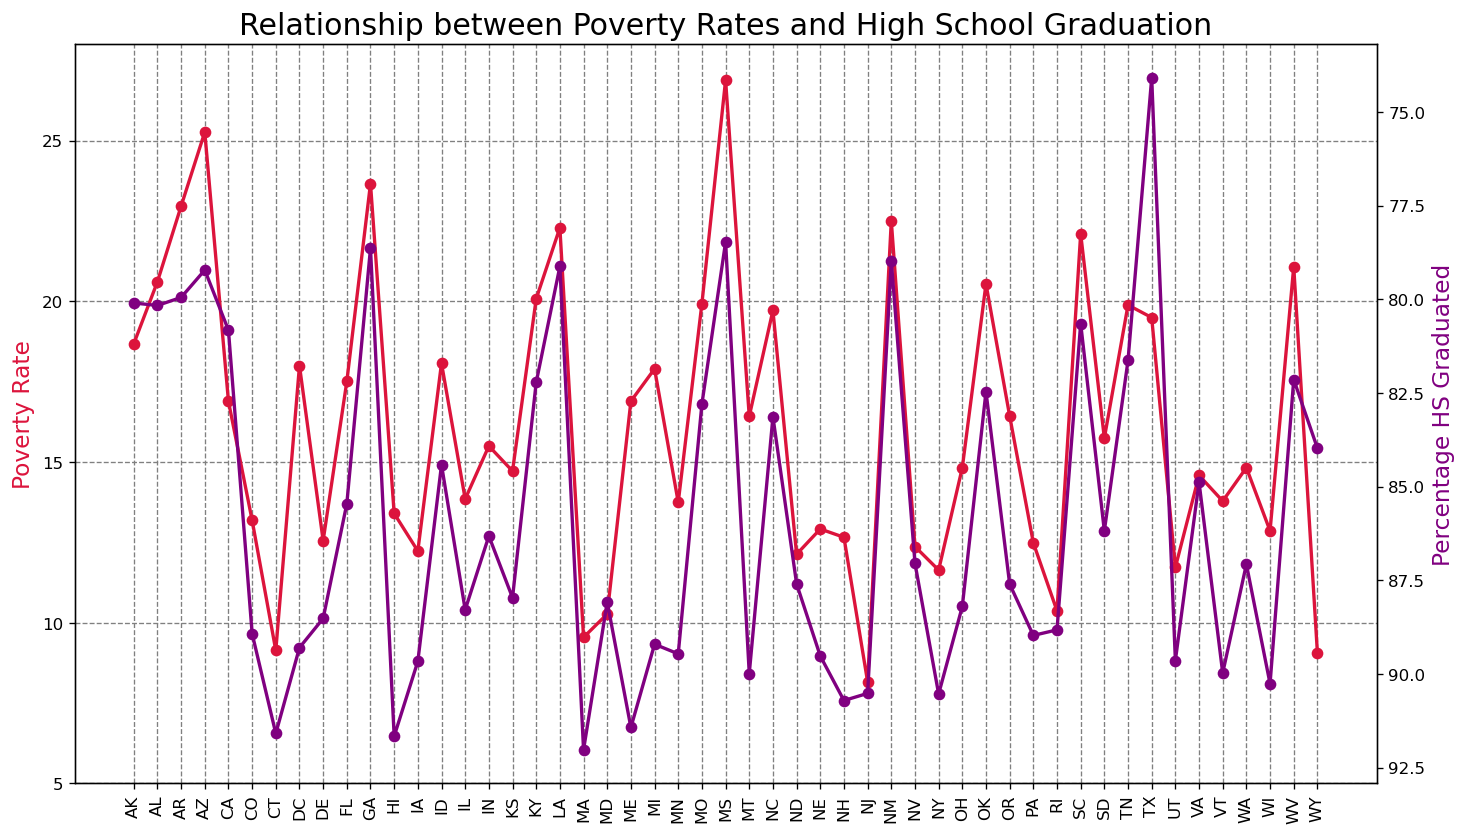

In [362]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Relationship between Poverty Rates and High School Graduation', fontsize=18)
plt.xticks(fontsize=10, rotation=90)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Poverty Rate', fontsize=14, color='crimson')
ax2.set_ylabel('Percentage HS Graduated', fontsize=14, color='purple')

ax1.set_ylim([5, 28])
# invert y axis to compare the poverty with the high school level
ax2.invert_yaxis()
#plot
ax1.plot(df_povertybystate['Geographic Area'], df_povertybystate['poverty_rate'],  color='crimson', linewidth=2, marker='o')
ax2.plot(df_hsbystate['Geographic Area'], df_hsbystate['percent_completed_hs'], color='purple', linewidth=2,  marker='o')
ax1.grid(color='grey', linestyle='--')
plt.show()

### Comments ###
The perentage of HS gradueted y-axis was inverted to comprare more clearly with the poverty rate. The chart shows for most of the states the poverty rate goes along with the stated where the percentage of HS gradueted are lower.

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [363]:
df_merged = pd.merge(df_povertybystate, df_hsbystate , on='Geographic Area')
df_merged.head()

,Geographic Area,poverty_rate,percent_completed_hs
0,AK,18.68,80.10
1,AL,20.61,80.16
2,AR,22.96,79.95
3,AZ,25.27,79.22
4,CA,16.89,80.82


<Figure size 1600x800 with 0 Axes>

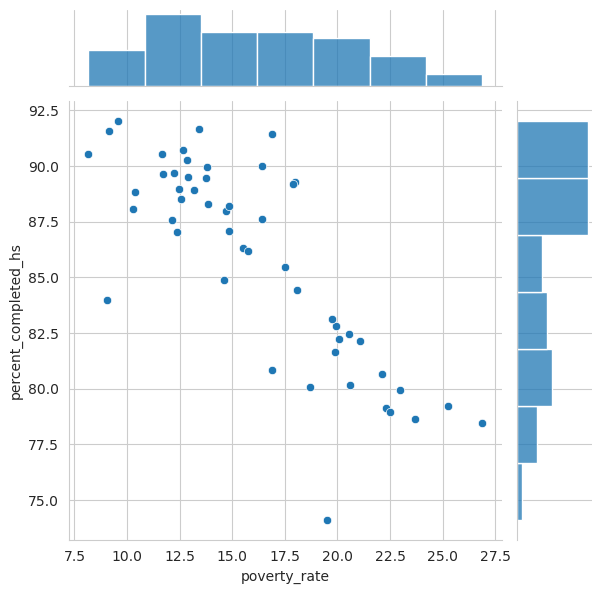

In [370]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):
    sns.jointplot(df_merged,
                 x=df_merged['poverty_rate'],
                 y=df_merged['percent_completed_hs'],  
                 kind='scatter'
                 )
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

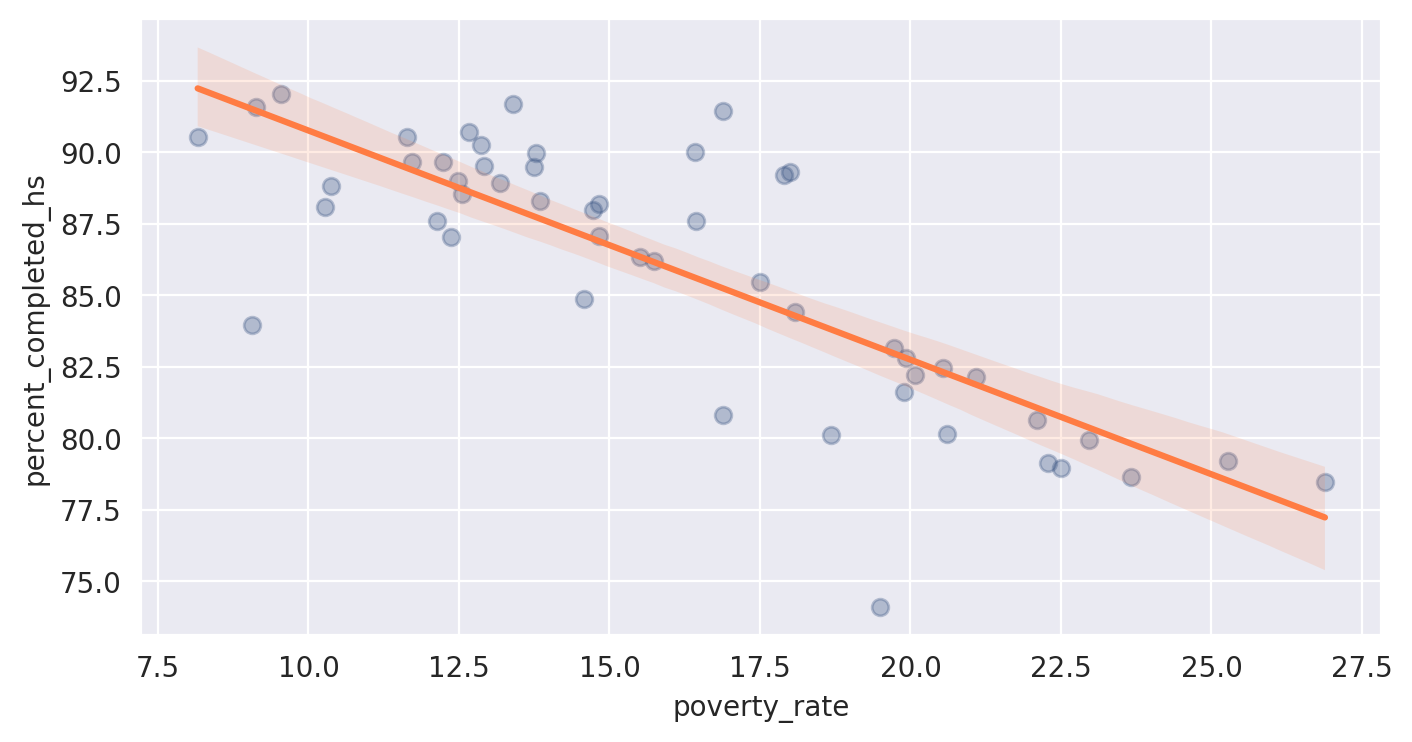

In [371]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    sns.regplot(data=df_merged, 
                x='poverty_rate', 
                y='percent_completed_hs',
                color= '#2f4b7c',
                scatter_kws={'alpha': 0.3},
                line_kws={'color':'#ff7c43'})
plt.show()

### Comments ###
Using jointplot and regplot looks like there is a relation between the proverty rate and percentage of completed HS if the poverty rate increaes the percentage of peple completed HS decreases. 

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [372]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

Convert the columns by city to rows and get the mean by state

In [376]:
df_melted =df_share_race_city.melt(id_vars=['Geographic area', 'City'], var_name='Racial Makeup', value_name='Percentage')
df_melted.head(10)

,Geographic area,City,Racial Makeup,Percentage
0,AL,Abanda CDP,share_white,67.20
1,AL,Abbeville city,share_white,54.40
2,AL,Adamsville city,share_white,52.30
3,AL,Addison town,share_white,99.10
4,AL,Akron town,share_white,13.20
5,AL,Alabaster city,share_white,79.40
6,AL,Albertville city,share_white,75.90
7,AL,Alexander City city,share_white,62.20
8,AL,Alexandria CDP,share_white,87.40
9,AL,Aliceville city,share_white,22.60


In [377]:
df_racialpercentage = df_melted.groupby(['Geographic area', 'Racial Makeup'], as_index=False).agg({'Percentage': pd.Series.mean})
df_racialpercentage.head()

,Geographic area,Racial Makeup,Percentage
0,AK,share_asian,1.38
1,AK,share_black,0.56
2,AK,share_hispanic,2.13
3,AK,share_native_american,45.48
4,AK,share_white,45.26


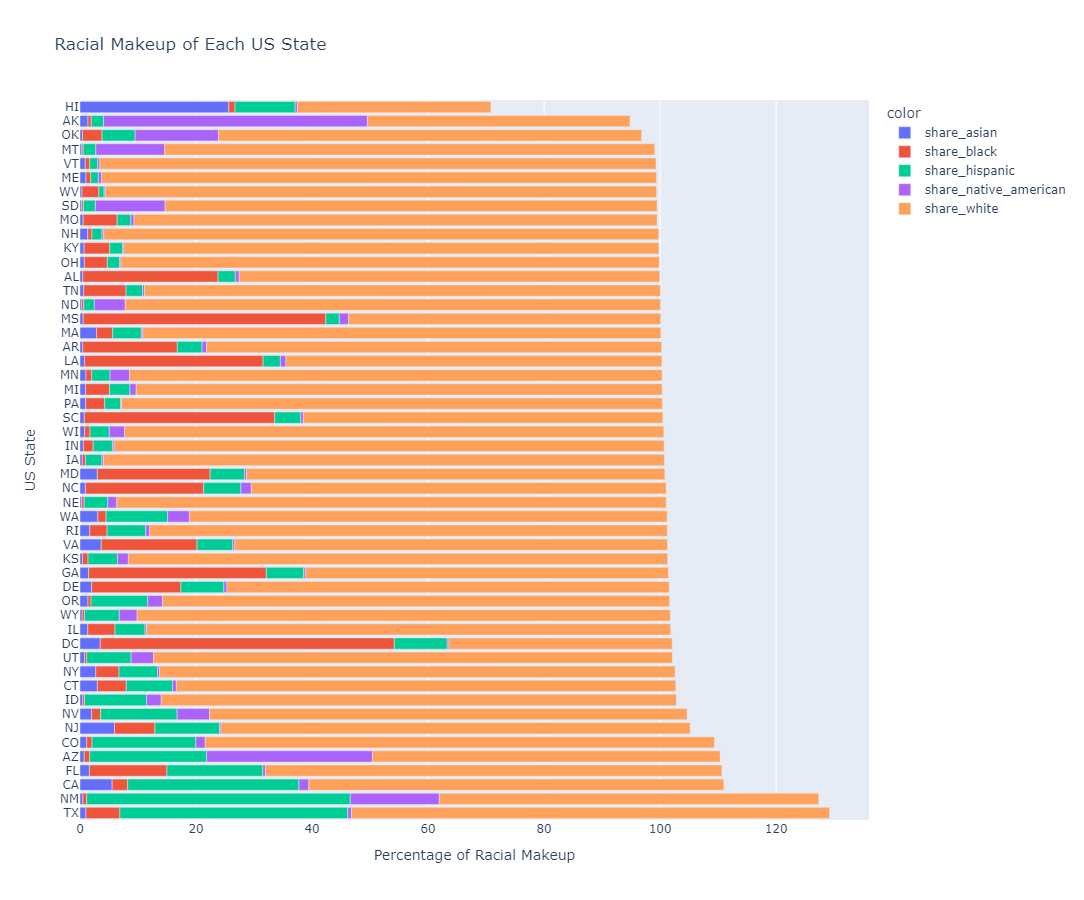

In [378]:
bar_racial = px.bar(y=df_racialpercentage['Geographic area'], 
                    x=df_racialpercentage['Percentage'], 
                    orientation='h', 
                    title='Racial Makeup of Each US State', 
                    color=df_racialpercentage['Racial Makeup'],  
                    height=900)
bar_racial.update_layout(xaxis_title='Percentage of Racial Makeup', 
                   yaxis_title='US State', 
                   yaxis={'categoryorder':'total descending'})
bar_racial.show()

In [379]:
df_racialpercentage[df_racialpercentage['Geographic area'] == 'TX']

,Geographic area,Racial Makeup,Percentage
215,TX,share_asian,1.01
216,TX,share_black,5.87
217,TX,share_hispanic,39.27
218,TX,share_native_american,0.66
219,TX,share_white,82.40


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [380]:
df_killbyrace = df_fatalities['race'].value_counts()
df_killbyrace

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: count, dtype: int64

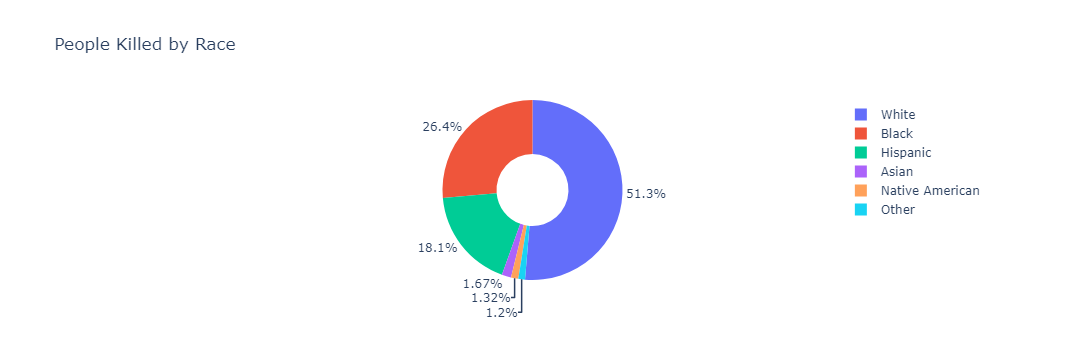

In [381]:
donut_killed = px.pie(labels=['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Other'], 
               values=df_killbyrace.values, 
               title='People Killed by Race', 
               names=['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Other'], 
               hole=0.4)
donut_killed.update_traces(textposition='outside', textinfo='percent', textfont_size=12)
donut_killed.show()

It is interesting to observe in the chart than more than el 51.3% of people killed by police are white following by black with 26.4%

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [382]:
df_fatalities.columns

Index(['name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race',
       'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera'],
      dtype='object')

In [383]:
df_killbygender = df_fatalities['gender'].value_counts()
df_killbygender

gender
M    2428
F     107
Name: count, dtype: int64

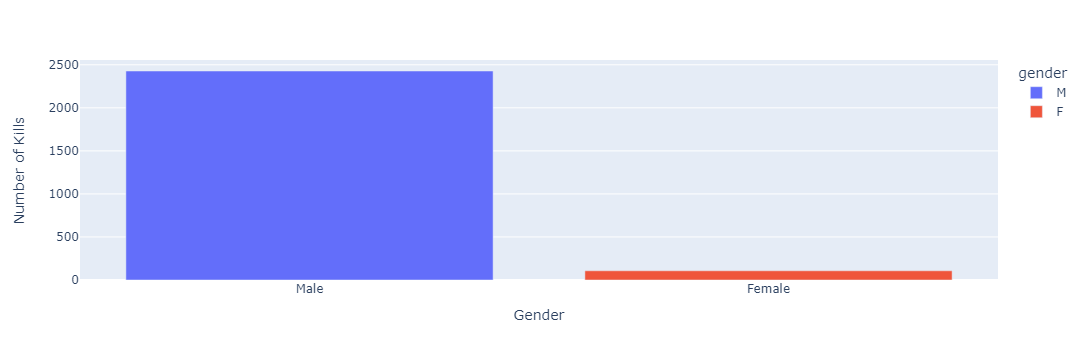

In [384]:
bar_gender = px.bar(df_killbygender,
                     x=['Male', 'Female'],
                     y=df_killbygender.values,
                     color= df_killbygender.index)
bar_gender.update_layout(xaxis_title = 'Gender', yaxis_title= 'Number of Kills', coloraxis_showscale=False)
bar_gender.show()

Only 107 women have benn killed by Police in contrast 2428 Male have been killed. 

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [386]:
df_fatalities['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

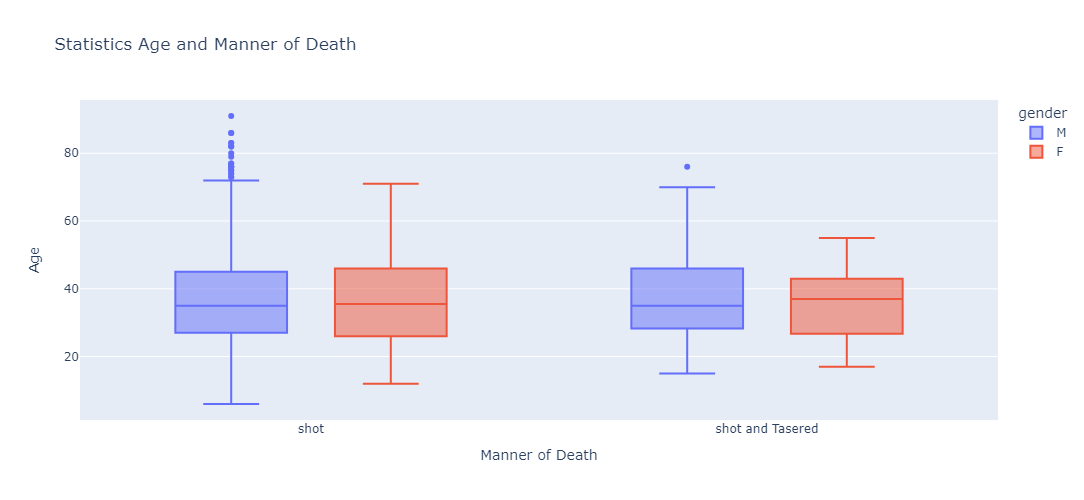

In [388]:
box_mdeath = px.box(df_fatalities,
                x='manner_of_death', 
                y='age',
                color='gender',
                height=500,
                title='Statistics Age and Manner of Death')
box_mdeath.update_layout(xaxis_title='Manner of Death', yaxis_title='Age')
box_mdeath.show()

### Comments ###
There are only 2 types of manner of death: shot and Tasered and shot, however regardingg the age there are no much diference between Male and Female the average age for both male is 35 ages and females aroun 37. The Male that have been shot goes from the youngest 6 years old to the oldest 91 years old.

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [389]:
df_fatalities[df_fatalities['armed'].isna()]

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
615,Benjamin Peter Ashley,15/08/15,shot,NaN,34.00,M,B,Inyokern,CA,False,attack,Not fleeing,False
1551,Jeffrey Smith,28/07/16,shot,NaN,47.00,M,B,La Quinta,CA,False,other,Car,False
1715,Clayton Eugene Baker,30/09/16,shot,NaN,38.00,M,W,Groveton,TX,False,undetermined,Not fleeing,False
1732,Larry Daniel Matthews,07/10/16,shot,NaN,57.00,M,B,Macon,GA,False,other,Not fleeing,False
1825,TK TK,11/11/16,shot and Tasered,NaN,36.00,M,NaN,East Point,GA,False,undetermined,NaN,False
1975,Gilbert Zambronio-Lovato,07/01/17,shot,NaN,38.00,M,H,Albuquerque,NM,False,other,Not fleeing,False
2145,Jose Olivares,28/02/17,shot,NaN,43.00,M,NaN,Houma,LA,True,undetermined,Not fleeing,False
2469,Brian Easley,07/07/17,shot,NaN,33.00,M,B,Marietta,GA,True,undetermined,Not fleeing,False
2487,James Gerald Davis,12/07/17,shot,NaN,40.00,M,NaN,Lake View,SC,False,undetermined,NaN,False


The rows with NaN values are few so leave the rows as they are

In [390]:
df_fatalities['armed'].nunique()

68

There are several different type of arms however most of then appear only once so I will take the 20 first

In [391]:
df_armed = df_fatalities['armed'].value_counts()[:20]
df_armed.head()

armed
gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
Name: count, dtype: int64

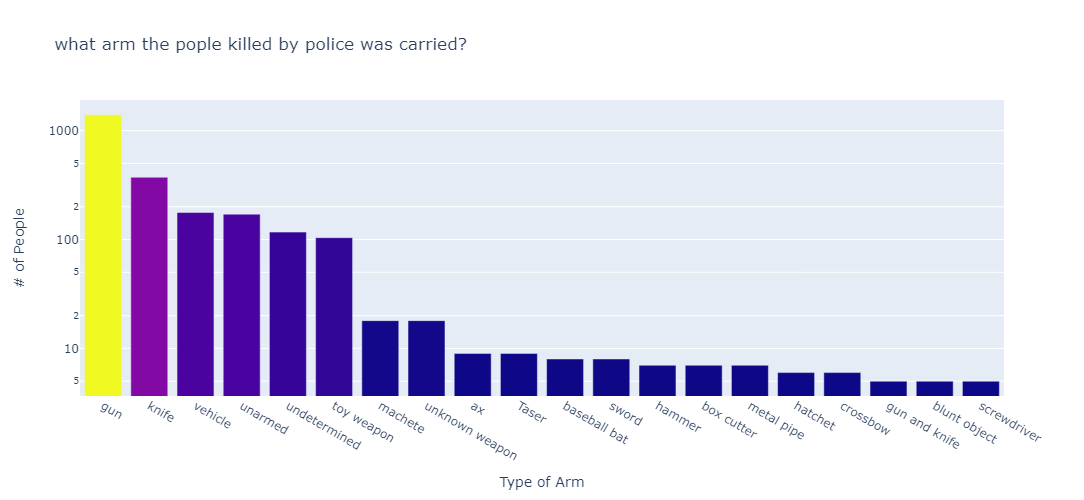

In [392]:
bar_armed = px.bar(df_armed, 
                 x=df_armed.index, 
                 y=df_armed.values, 
                 color=df_armed.values,
                 color_continuous_scale='plasma',
                 height=500,
                 title='what arm the pople killed by police was carried?')
bar_armed.update_layout(xaxis_title='Type of Arm', 
                     yaxis_title='# of People', 
                     coloraxis_showscale=False,
                     yaxis=dict(type='log')
                     )
                    
bar_armed.show()

In [185]:
unarmed = df_fatalities[df_fatalities['armed'] == 'unarmed']['armed'].count()

In [186]:
armed = df_fatalities[df_fatalities['armed'] != 'unarmed']['armed'].count()

In [197]:
print(f"Percentage of people killed by police that were armed is: {unarmed/armed * 100:.2f}% which indicated that more than 90% of people had an arm")

Percentage of people killed by police that were armed is: 7.26% which indicated that more than 90% of people had an arm


The most used arm is gun 1398 following by knife with only 373

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [395]:
under25 = df_fatalities[df_fatalities['age'] < 25]['age'].count()
under25

450

In [396]:
over25 = df_fatalities[df_fatalities['age'] >= 25]['age'].count()
over25

2085

In [397]:
print(f"Percentage of people killed by police that were under 25 years: {under25/over25 * 100:.2f}% which it is a high pct for young ppl.")

Percentage of people killed by police that were under 25 years: 21.58% which it is a high pct for young ppl.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

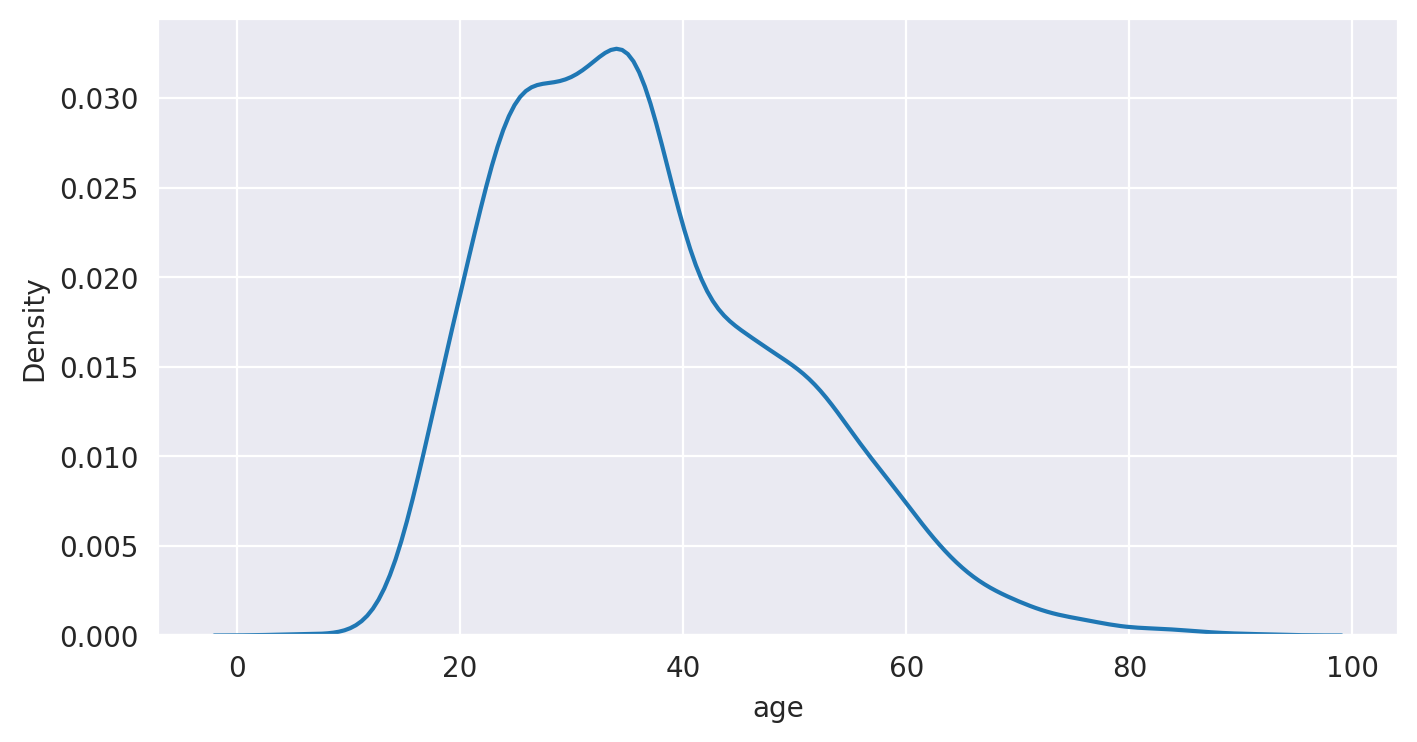

In [398]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    sns.kdeplot(data=df_fatalities, x=df_fatalities['age'])

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

### Note ###
Replace NaN valus for U = Unknown and then map gender value accordingly.

In [405]:
df_fatalities[df_fatalities['race'].isna()]

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
59,William Campbell,25/01/15,shot,gun,59.00,M,NaN,Winslow,NJ,False,attack,Not fleeing,False
241,John Marcell Allen,30/03/15,shot,gun,54.00,M,NaN,Boulder City,NV,False,attack,Not fleeing,False
266,Mark Smith,09/04/15,shot and Tasered,vehicle,54.00,M,NaN,Kellyville,OK,False,attack,Other,False
340,Joseph Roy,07/05/15,shot,knife,72.00,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False
398,James Anthony Morris,31/05/15,shot,gun,40.00,M,NaN,Medford,OR,True,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,Matthew Folden,27/07/17,shot,knife,31.00,M,NaN,Wenatchee,WA,False,other,Not fleeing,False
2529,Brian J. Skinner,28/07/17,shot,knife,32.00,M,NaN,Glenville,NY,True,other,Not fleeing,False
2530,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,TK TK,28/07/17,shot,vehicle,35.00,M,NaN,Albuquerque,NM,False,attack,Car,False


In [406]:
df_fatalities['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [408]:
df_fatalities['race'].fillna('U', inplace=True)
df_fatalities['race'].unique()

array(['A', 'W', 'H', 'B', 'O', 'U', 'N'], dtype=object)

In [409]:
race_map = {'A' : 'Asian', 'W': 'White', 'H': 'Hispanic', 'B': 'Black', 'O': 'Other', 'U': 'Unknown', 'N' : 'Native America'}

In [411]:
df_fatalities['race_full'] = df_fatalities['race'].map(race_map)
df_fatalities.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,race_full
0,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Asian
1,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,White
2,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,Hispanic
3,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,White
4,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,Hispanic


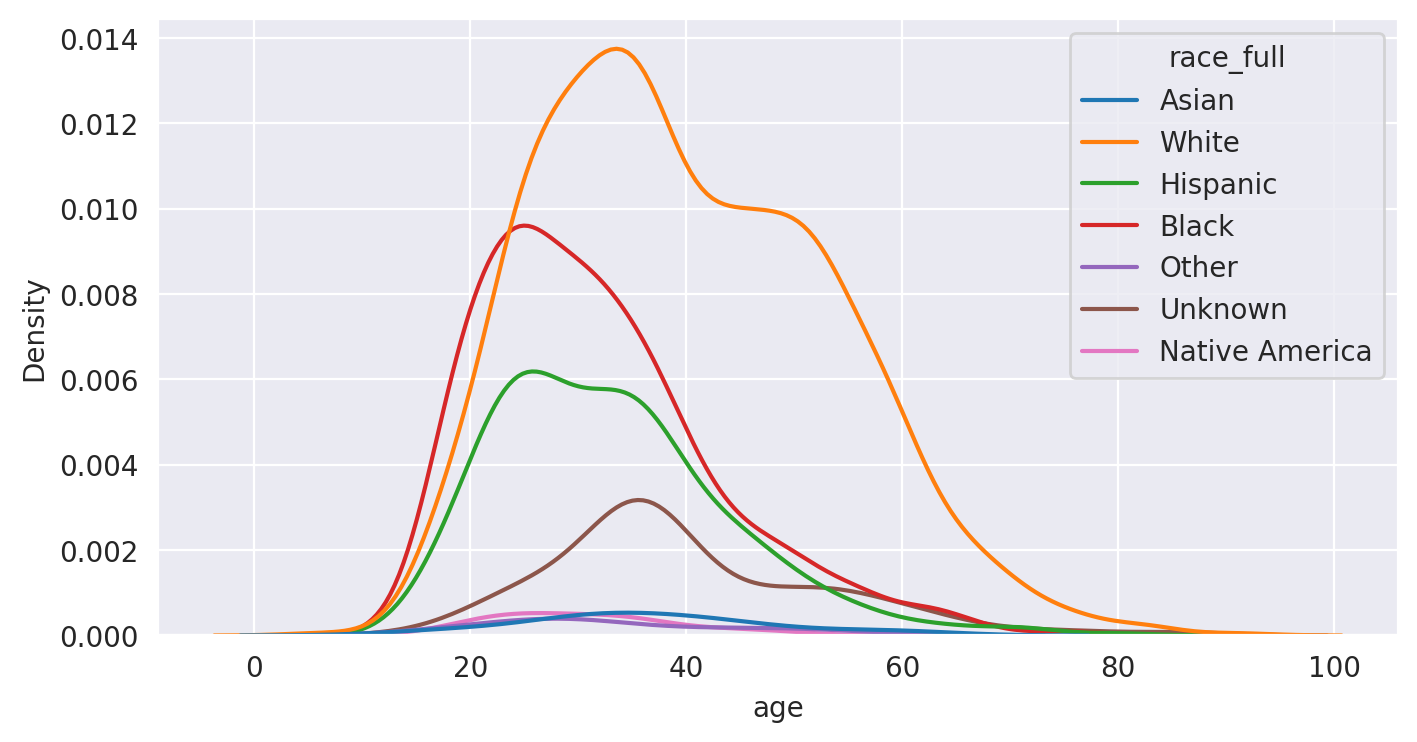

In [412]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    sns.kdeplot(data=df_fatalities, x=df_fatalities['age'], hue=df_fatalities['race_full'])

### Analysis ###
The density for the KDE plot it is clear that 3 most prominent races in the US are the ones that have the most density white americas tends to be killed between 25 and even 50 yeras old.
Black people are younger in this plot form 20 years old to 37 years old while Hispanic goes from 22 years old to 38 years old. 

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [413]:
df_killrace = df_fatalities['race_full'].value_counts()
df_killrace.head()

race_full
White       1201
Black        618
Hispanic     423
Unknown      195
Asian         39
Name: count, dtype: int64

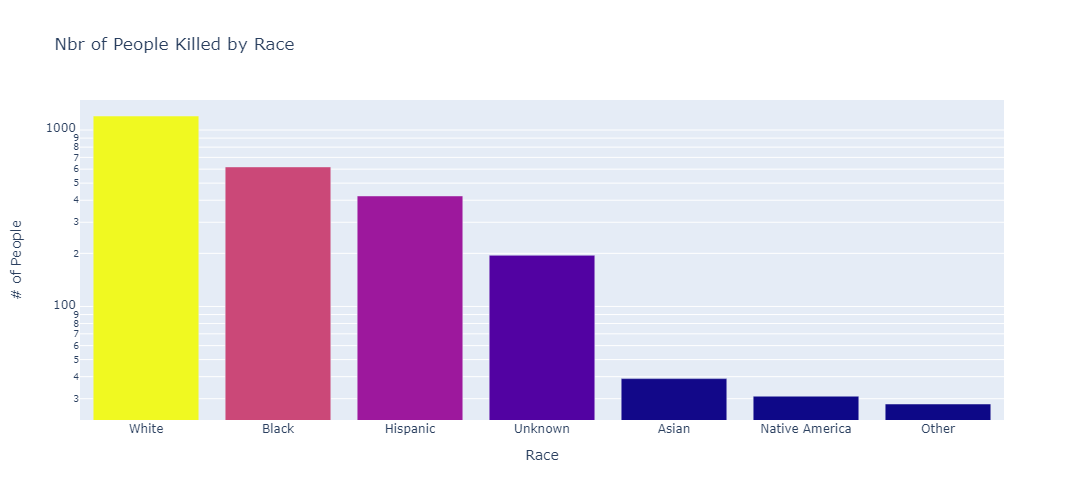

In [415]:
bar_race = px.bar(df_killrace, 
                 x=df_killrace.index, 
                 y=df_killrace.values, 
                 color=df_killrace.values,
                 color_continuous_scale='plasma',
                 height=500,
                 title='Nbr of People Killed by Race')
bar_race.update_layout(xaxis_title='Race', 
                     yaxis_title='# of People', 
                     coloraxis_showscale=False,
                     yaxis=dict(type='log')
                     )
                    
bar_race.show()

### Analysis ###
Inetersting to see that the White peple is almost the double of Black people killed by police, Hispanic in third place and there are 195 kills where the race is unkonwn, very interesting in a country where the race classification is so important.

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [416]:
df_fatalities['signs_of_mental_illness'].value_counts()[False]

1902

In [417]:
no_illness = df_fatalities['signs_of_mental_illness'].value_counts()[False]
mental_illness = df_fatalities['signs_of_mental_illness'].value_counts()[True]

In [418]:
print(f"Percentage of people killed by police that were dignosed with mental illness: {mental_illness/no_illness * 100:.2f}% ")

Percentage of people killed by police that were dignosed with mental illness: 33.28% 


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [227]:
df_fatalities.columns

Index(['name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race',
       'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera'],
      dtype='object')

In [419]:
df_cities = df_fatalities.groupby('city', as_index=False).count()
df_cities = df_cities.sort_values('name', ascending=False)[:10]
df_killcity = df_cities[['city', 'name']]
df_killcity.columns = ['city', 'count']
df_killcity

,city,count
732,Los Angeles,39
995,Phoenix,31
578,Houston,27
241,Chicago,25
687,Las Vegas,21
1118,San Antonio,20
284,Columbus,19
808,Miami,18
60,Austin,18
1217,St. Louis,15


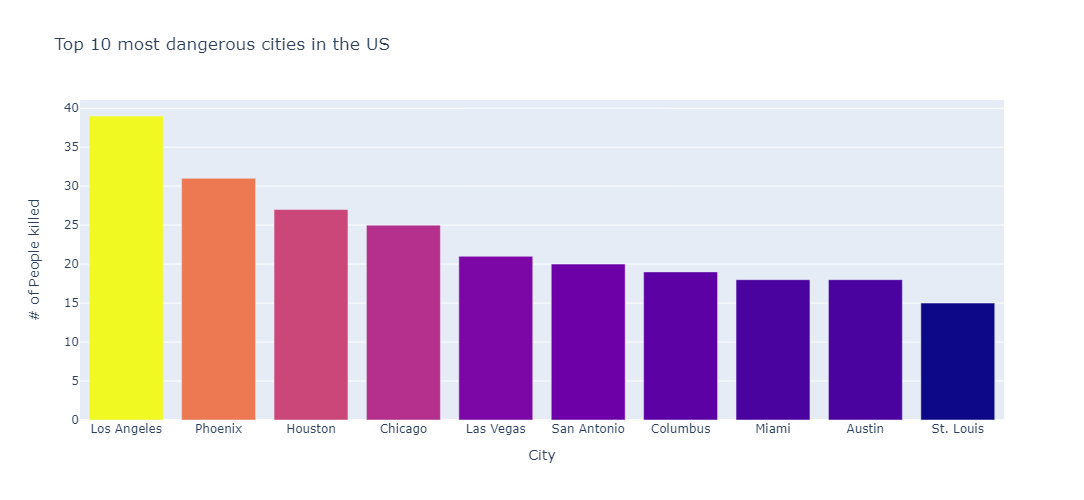

In [420]:
bar_city = px.bar(df_killcity, 
                 x=df_killcity['city'], 
                 y=df_killcity['count'], 
                 color=df_killcity['count'],
                 color_continuous_scale='plasma',
                 height=500,
                 title='Top 10 most dangerous cities in the US')
bar_city.update_layout(xaxis_title='City', 
                     yaxis_title='# of People killed', 
                     coloraxis_showscale=False
                     )
                    
bar_city.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [421]:
df_cityrace = df_fatalities[['name','city','race_full']].groupby(['city','race_full'], as_index=False).agg({'name': pd.Series.count})
df_cityrace.columns = ['city', 'race', 'countbyrace']
df_cityrace.head()

,city,race,countbyrace
0,Abbeville,Black,1
1,Abilene,White,1
2,Abingdon,White,1
3,Acworth,White,1
4,Addison,Hispanic,1


In [423]:
df_mergedcity = df_killcity.merge(df_cityrace, how='left')
df_mergedcity['rate'] = df_mergedcity['countbyrace']/df_mergedcity['count'] * 100
df_mergedcity.head()

,city,count,race,countbyrace,rate
0,Los Angeles,39,Asian,1,2.56
1,Los Angeles,39,Black,10,25.64
2,Los Angeles,39,Hispanic,19,48.72
3,Los Angeles,39,Unknown,3,7.69
4,Los Angeles,39,White,6,15.38


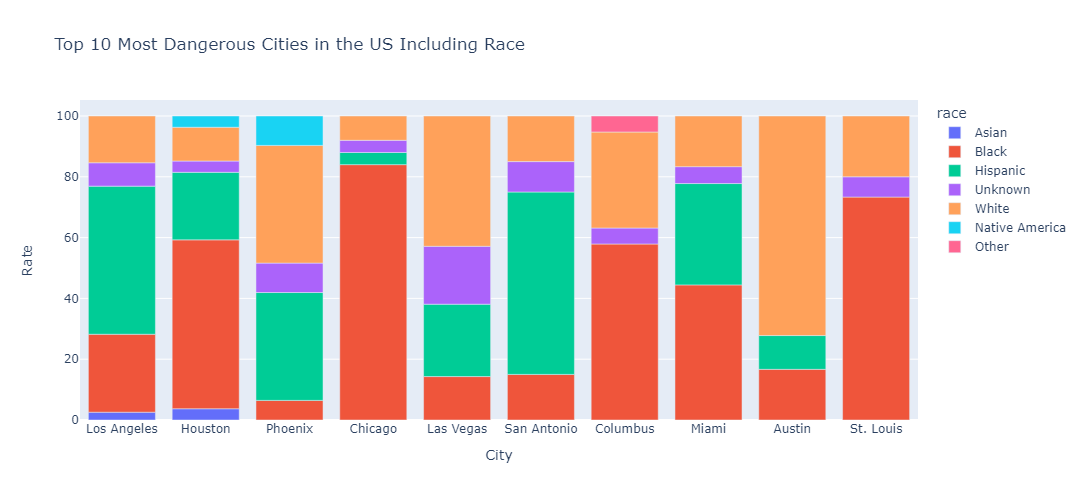

In [424]:
bar_rate = px.bar(df_mergedcity, 
                 x=df_mergedcity['city'], 
                 y=df_mergedcity['rate'], 
                 color=df_mergedcity['race'],
                 color_continuous_scale='plasma',
                 height=500,
                 title='Top 10 Most Dangerous Cities in the US Including Race')
bar_rate.update_layout(xaxis_title='City', 
                     yaxis_title='Rate'                
                     )
                    
bar_rate.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [425]:
df_states = df_fatalities[['state', 'name']].groupby('state', as_index=False).count()
df_states.columns = ['state', 'count']
df_states.head()

,state,count
0,AK,15
1,AL,50
2,AR,26
3,AZ,118
4,CA,424


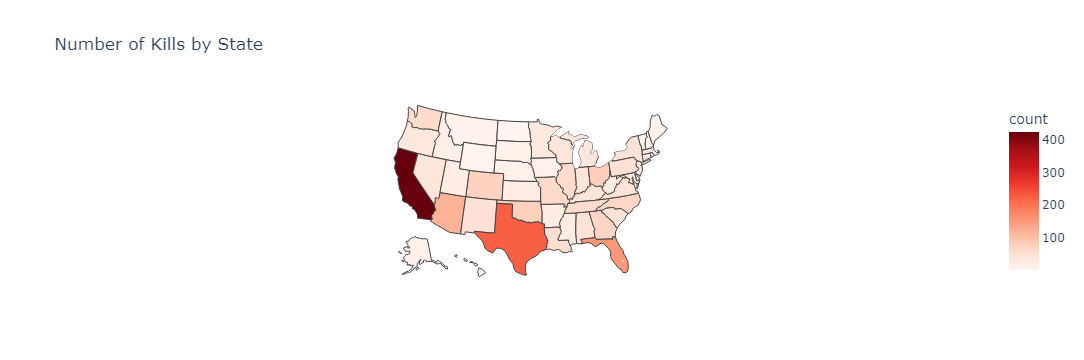

<Figure size 2800x1200 with 0 Axes>

In [426]:
plt.figure(figsize=(14,6), dpi=200)
map_kill = px.choropleth(df_states, 
                      locations='state', 
                      scope='usa',
                      locationmode='USA-states',
                      hover_name='state', 
                      color='count', 
                      color_continuous_scale='reds',
                      title='Number of Kills by State')
map_kill.update_layout(coloraxis_showscale=True)
map_kill.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [427]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     2535 non-null   object 
 1   date                     2535 non-null   object 
 2   manner_of_death          2535 non-null   object 
 3   armed                    2526 non-null   object 
 4   age                      2535 non-null   float64
 5   gender                   2535 non-null   object 
 6   race                     2535 non-null   object 
 7   city                     2535 non-null   object 
 8   state                    2535 non-null   object 
 9   signs_of_mental_illness  2535 non-null   bool   
 10  threat_level             2535 non-null   object 
 11  flee                     2470 non-null   object 
 12  body_camera              2535 non-null   bool   
 13  race_full                2535 non-null   object 
dtypes: bool(2), float64(1), 

In [428]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='mixed')
df_fatalities.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,race_full
0,Tim Elliot,2015-02-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Asian
1,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,White
2,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,Hispanic
3,Matthew Hoffman,2015-04-01,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,White
4,Michael Rodriguez,2015-04-01,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,Hispanic


In [429]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     2535 non-null   object        
 1   date                     2535 non-null   datetime64[ns]
 2   manner_of_death          2535 non-null   object        
 3   armed                    2526 non-null   object        
 4   age                      2535 non-null   float64       
 5   gender                   2535 non-null   object        
 6   race                     2535 non-null   object        
 7   city                     2535 non-null   object        
 8   state                    2535 non-null   object        
 9   signs_of_mental_illness  2535 non-null   bool          
 10  threat_level             2535 non-null   object        
 11  flee                     2470 non-null   object        
 12  body_camera              2535 non-

In [430]:
df_fatalities['date'].min()

Timestamp('2015-01-03 00:00:00')

In [431]:
df_fatalities['date'].max()

Timestamp('2017-12-07 00:00:00')

In [432]:
df_fatalities['date'].nunique()

879

### Analysis ###
There are 879 different dates however to create a chart we are going to group the kills by police by month so we visualize the chart more clearly

In [435]:
df_fatalities['date'] = df_fatalities['date'].dt.to_period('M').dt.to_timestamp()

In [436]:
df_fatalities['date'].nunique()

36

In [437]:
df_killtime = df_fatalities[['date', 'name']].groupby('date', as_index=False).count()
df_killtime.columns = ['date','kills']
df_killtime.head()

,date,kills
0,2015-01-01,70
1,2015-02-01,78
2,2015-03-01,87
3,2015-04-01,88
4,2015-05-01,85


In [438]:
df_killtime.tail(7)

,date,kills
29,2017-06-01,63
30,2017-07-01,71
31,2017-08-01,18
32,2017-09-01,23
33,2017-10-01,21
34,2017-11-01,16
35,2017-12-01,20


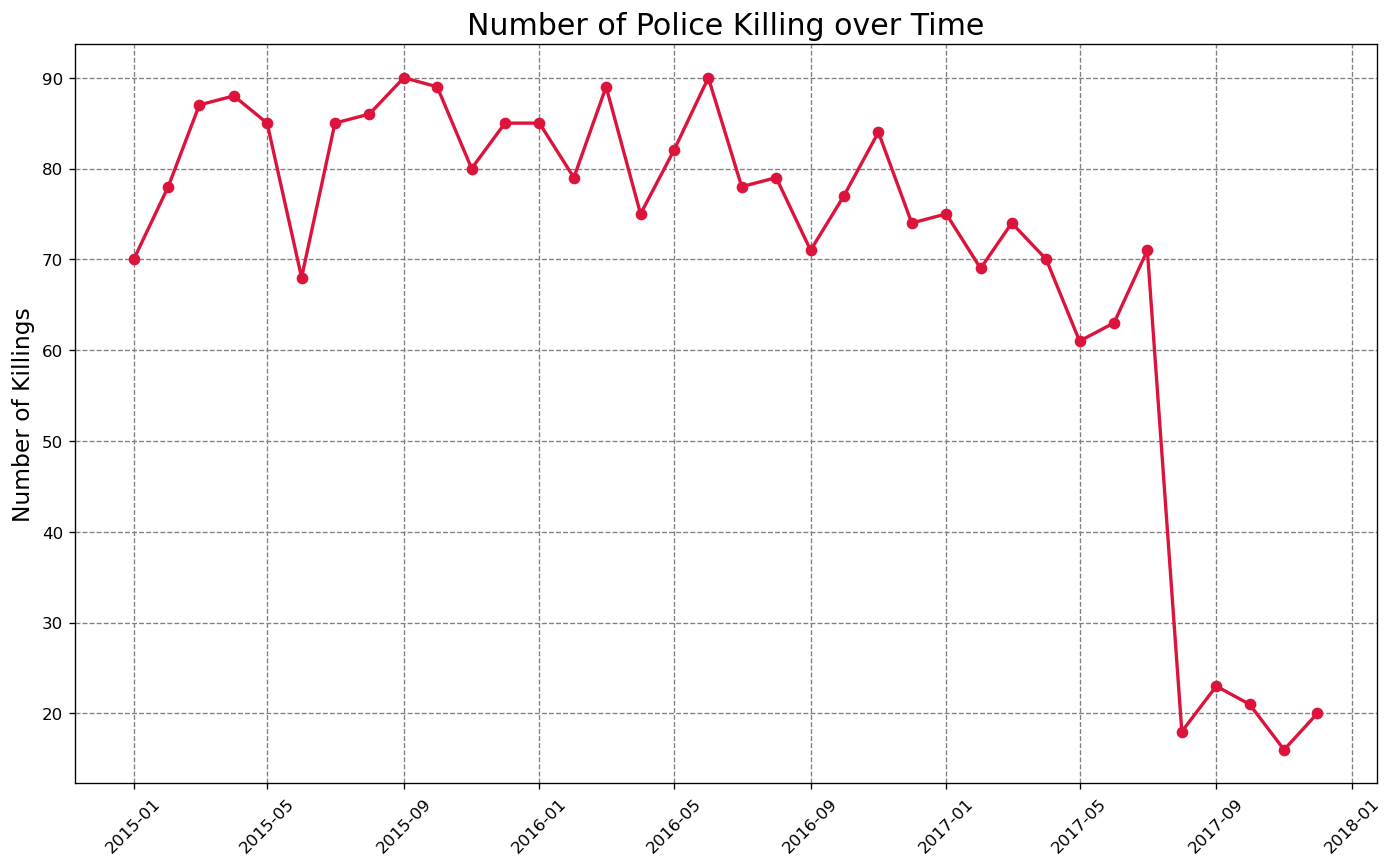

In [439]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Number of Police Killing over Time', fontsize=18)
plt.xticks(fontsize=10, rotation=45)

ax1 = plt.gca()

ax1.set_ylabel('Number of Killings', fontsize=14)

#plot
ax1.plot(df_killtime['date'], df_killtime['kills'],  color='crimson', linewidth=2, marker='o')

ax1.grid(color='grey', linestyle='--')
plt.show()

### Analysis ###
During 2015 to 2016 where an average 80 kils by month however from July 2017 to Agust 2017 a decrease from 71 a 18 kills and after that there is an average of 20 kills per month a enormous decrease.

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).